### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

# Load and Inspect the Dataset

In [17]:
import pandas as pd

# Load the datasets
train_url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv'
test_url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv'

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Inspect the first few rows of the dataset
train_data.head(), test_data.head()


(    Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0         NaN             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Urban           Y  
 1             1.0         Rural           N  
 2 

# Data Preprocessing

In [23]:
#Handle Missing Values

# Separate numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Fill missing values for numerical features with the mean
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].mean())

# Fill missing values for categorical features with the mode (most frequent value)
train_data[categorical_cols] = train_data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Check if any missing values remain
train_data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Feature Encoding
converting categorical features into numerical values using One-Hot Encoding for features like Gender, Married, Education, etc.One-hot encoding is a process of converting categorical variables into a format that can be provided to ML algorithms to improve prediction accuracy.

Why: One-hot encoding avoids the ordinal relationship problem (e.g., "Male" < "Female") by creating separate binary columns for each category

In [28]:
# Perform one-hot encoding for categorical columns
train_data_encoded = pd.get_dummies(train_data, drop_first=True)

# Display the first few rows to verify the encoding
train_data_encoded.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,False,False,...,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True


# Feature Scaling
After encoding the categorical columns, we need to scale numerical features to bring them into the same range because many machine learning models (like KNN, SVM, and Logistic Regression) are sensitive to the scale of the features.

Standard Scaling (Z-Score Normalization)
We will standardize the numerical features using StandardScaler, which will scale the data so that the mean is 0 and the standard deviation is 1.

Why: Scaling is important to ensure that features with larger values (like ApplicantIncome) do not dominate the model's performance over features with smaller values (like LoanAmount).

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns
numerical_cols = train_data_encoded.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling to numerical columns
train_data_encoded[numerical_cols] = scaler.fit_transform(train_data_encoded[numerical_cols])

# Display the first few rows after scaling
train_data_encoded.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.072991,-0.554487,0.000000,0.279851,0.45164,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1,-0.134412,-0.038732,-0.219273,0.279851,0.45164,True,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
2,-0.393747,-0.554487,-0.957641,0.279851,0.45164,False,True,False,False,False,...,True,True,False,False,False,False,True,False,True,True
3,-0.462062,0.251980,-0.314547,0.279851,0.45164,False,False,True,False,False,...,True,True,False,False,False,True,False,False,True,True
4,0.097728,-0.554487,-0.064454,0.279851,0.45164,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,True


# Splitting the Data into Training and Validation Sets
We will split the data into features (X) and target (y) variables, and then further split the data into a training and validation set to evaluate model performance.

Why: The split ensures that we train the models on a subset of the data while reserving another subset to evaluate how well the model generalizes to unseen data.

In [35]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = train_data_encoded.drop('Loan_Status_Y', axis=1)
# Drop target column from features because model will learn from features and try to predict the target
y = train_data_encoded['Loan_Status_Y']  # Target column

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((491, 627), (123, 627), (491,), (123,))

# Model Selection and Hyperparameter Tuning
To find the best performing model, we use techniques like GridSearchCV, which allows us to search for the optimal combination of hyperparameters. 

In [38]:
# Decision Tree parameter grid
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# KNN parameter grid
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Logistic Regression parameter grid
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

# SVM parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# XGBoost parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0]
}


# Run GridSearchCV for Each Model


In [45]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.9 MB/s eta 0:00:00a 0:00:01


In [68]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize classifiers with appropriate parameters
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
log_reg = LogisticRegression(solver='saga', max_iter=5000, C=10)
svm = SVC(probability=True) 
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Perform GridSearchCV for each model with cross-validation
dt_grid = GridSearchCV(dt, dt_param_grid, cv=5, n_jobs=-1, verbose=1)
dt_grid.fit(X_train, y_train)

knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)

log_reg_grid = GridSearchCV(log_reg, log_reg_param_grid, cv=5, n_jobs=-1, verbose=1)
log_reg_grid.fit(X_train, y_train)

svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)

rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=1)

# Evaluate the Models and Get Best Accuracy


In [71]:
from sklearn.metrics import accuracy_score

# Dictionary to store best accuracy for each model
models = {
    "Decision Tree": dt_grid,
    "KNN": knn_grid,
    "Logistic Regression": log_reg_grid,
    "SVM": svm_grid,
    "Random Forest": rf_grid,
    "XGBoost": xgb_grid
}

best_accuracies = {}

# Evaluate each model
for model_name, model_grid in models.items():
    best_accuracy = accuracy_score(y_val, model_grid.best_estimator_.predict(X_val))
    best_accuracies[model_name] = best_accuracy
    print(f"{model_name} Best Accuracy: {best_accuracy}")


Decision Tree Best Accuracy: 0.7886178861788617
KNN Best Accuracy: 0.7804878048780488
Logistic Regression Best Accuracy: 0.7886178861788617
SVM Best Accuracy: 0.7886178861788617
Random Forest Best Accuracy: 0.7886178861788617
XGBoost Best Accuracy: 0.7886178861788617


#all models have reached an accuracy of approximately 78.86%.
This suggests that, given the hyperparameters tested during GridSearchCV, none of the models significantly outperformed the others in terms of accuracy. The performance is relatively consistent across different algorithm.Let's dive deeper into additional performance metrics that can give us more insights into the models' effectiveness, especially when dealing with potential imbalances in the dataset.

In [73]:
# Import necessary libraries for metrics and plotting
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Define a dictionary to store the best estimators from GridSearchCV
models = {
    'Decision Tree': dt_grid.best_estimator_,
    'KNN': knn_grid.best_estimator_,
    'Logistic Regression': log_reg_grid.best_estimator_,
    'SVM': svm_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'XGBoost': xgb_grid.best_estimator_
}

# Initialize a dictionary to store metrics for each model
metrics = {}

# Calculate metrics for each model
for model_name, model in models.items():
    # Predict on the validation data
    y_pred = model.predict(X_val)
    
    # Calculate precision, recall, F1-score, and AUC
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])  # Assuming the positive class is the second one
    
    # Generate ROC curve data
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    
    # Store the metrics
    metrics[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc,
        'FPR': fpr,
        'TPR': tpr,
        'Thresholds': thresholds
    }

# Print the calculated metrics for each model
for model_name, metric in metrics.items():
    print(f"{model_name}:")
    print(f"  Precision: {metric['Precision']:.4f}")
    print(f"  Recall: {metric['Recall']:.4f}")
    print(f"  F1-Score: {metric['F1-Score']:.4f}")
    print(f"  AUC: {metric['AUC']:.4f}")
    print("\n")


Decision Tree:
  Precision: 0.7596
  Recall: 0.9875
  F1-Score: 0.8587
  AUC: 0.7244


KNN:
  Precision: 0.7573
  Recall: 0.9750
  F1-Score: 0.8525
  AUC: 0.6965


Logistic Regression:
  Precision: 0.7596
  Recall: 0.9875
  F1-Score: 0.8587
  AUC: 0.7666


SVM:
  Precision: 0.7596
  Recall: 0.9875
  F1-Score: 0.8587
  AUC: 0.7343


Random Forest:
  Precision: 0.7596
  Recall: 0.9875
  F1-Score: 0.8587
  AUC: 0.7789


XGBoost:
  Precision: 0.7596
  Recall: 0.9875
  F1-Score: 0.8587
  AUC: 0.7330




Random Forest is slightly better than the others in terms of AUC, but the difference is not huge.
Models like Decision Tree, Logistic Regression, and SVM seem to perform similarly, with XGBoost being a close competitor.
The KNN model, while performing well in terms of precision, recall, and F1-score, appears to have the lowest ability to distinguish between classes as measured by the AUC.

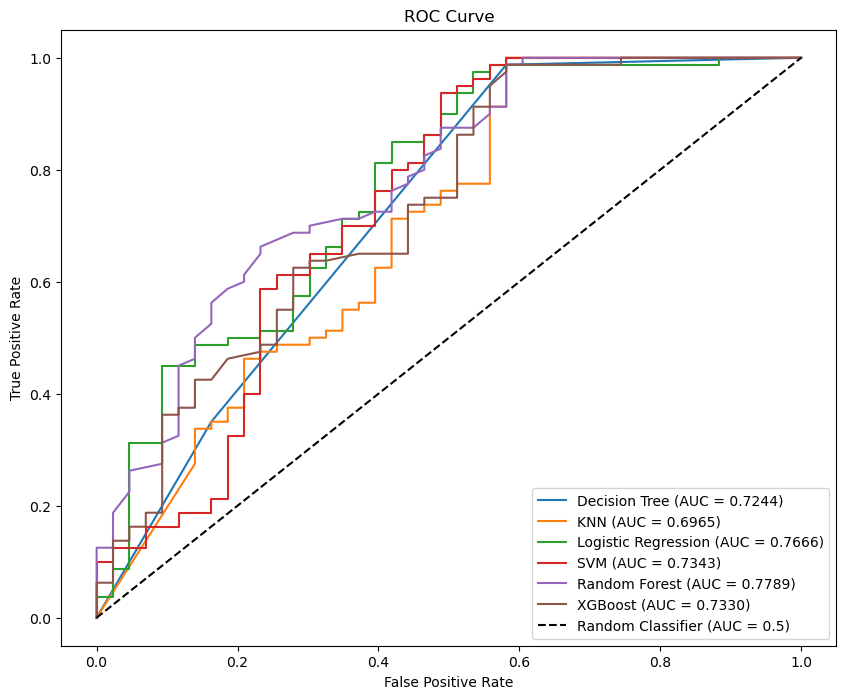

In [75]:
# Plot ROC Curve for each model
plt.figure(figsize=(10, 8))

# Plot the ROC curve for each model
for model_name, metric in metrics.items():
    plt.plot(metric['FPR'], metric['TPR'], label=f'{model_name} (AUC = {metric["AUC"]:.4f})')

# Plot the random classifier (AUC = 0.5) as a baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Show legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


# further analyze and optimize the models, particularly focusing on improving the AUC for XGBoost and Random Forest:



# Hyperparameter Tuning

In [79]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
xgb_grid.fit(X_train, y_train)

# Best hyperparameters and AUC score
print("Best Hyperparameters for XGBoost:", xgb_grid.best_params_)
print("Best AUC for XGBoost:", xgb_grid.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best AUC for XGBoost: 0.7723522062498163


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

# Best hyperparameters and AUC score
print("Best Hyperparameters for Random Forest:", rf_grid.best_params_)
print("Best AUC for Random Forest:", rf_grid.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best AUC for Random Forest: 0.7978166798953464


# Feature Importance
For both Random Forest and XGBoost, we can inspect feature importance to understand which features contribute most to the model's predictions

In [84]:
# For Random Forest
rf_best = rf_grid.best_estimator_
importances_rf = rf_best.feature_importances_
features = X_train.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': importances_rf})
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)
print(importance_df_rf)

# For XGBoost
xgb_best = xgb_grid.best_estimator_
importances_xgb = xgb_best.feature_importances_
importance_df_xgb = pd.DataFrame({'Feature': features, 'Importance': importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)
print(importance_df_xgb)


               Feature  Importance
4       Credit_History    0.190207
0      ApplicantIncome    0.078868
2           LoanAmount    0.074417
1    CoapplicantIncome    0.051938
3     Loan_Amount_Term    0.033238
..                 ...         ...
429   Loan_ID_LP002366    0.000000
108   Loan_ID_LP001357    0.000000
435   Loan_ID_LP002379    0.000000
105   Loan_ID_LP001349    0.000000
10    Loan_ID_LP001013    0.000000

[627 rows x 2 columns]
                     Feature  Importance
4             Credit_History    0.389221
625  Property_Area_Semiurban    0.070009
619              Married_Yes    0.056188
621             Dependents_2    0.054058
3           Loan_Amount_Term    0.050191
..                       ...         ...
218         Loan_ID_LP001716    0.000000
219         Loan_ID_LP001720    0.000000
220         Loan_ID_LP001722    0.000000
221         Loan_ID_LP001726    0.000000
313         Loan_ID_LP001998    0.000000

[627 rows x 2 columns]


In [130]:
# Set a threshold for feature importance
importance_threshold = 0.01  # You can adjust this threshold based on your findings

# For Random Forest: Remove features with importance below the threshold
low_importance_rf = importance_df_rf[importance_df_rf['Importance'] < importance_threshold]['Feature'].values
X_train_rf_removed = X_train.drop(columns=low_importance_rf)
X_val_rf_removed = X_val.drop(columns=low_importance_rf)

# Retrain Random Forest after feature removal
rf_tuned_removed = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
rf_tuned_removed.fit(X_train_rf_removed, y_train)

# Evaluate the performance
y_pred_prob_rf_removed = rf_tuned_removed.best_estimator_.predict_proba(X_val_rf_removed)[:, 1]
roc_auc_rf_removed = roc_auc_score(y_val, y_pred_prob_rf_removed)
print(f"Random Forest AUC after feature removal: {roc_auc_rf_removed}")


# For XGBoost: Remove features with importance below the threshold
low_importance_xgb = importance_df_xgb[importance_df_xgb['Importance'] < importance_threshold]['Feature'].values
X_train_xgb_removed = X_train.drop(columns=low_importance_xgb)
X_val_xgb_removed = X_val.drop(columns=low_importance_xgb)

# Retrain XGBoost after feature removal
xgb_tuned_removed = GridSearchCV(
    XGBClassifier(random_state=42),
    xgb_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
xgb_tuned_removed.fit(X_train_xgb_removed, y_train)

# Evaluate the performance
y_pred_prob_xgb_removed = xgb_tuned_removed.best_estimator_.predict_proba(X_val_xgb_removed)[:, 1]
roc_auc_xgb_removed = roc_auc_score(y_val, y_pred_prob_xgb_removed)
print(f"XGBoost AUC after feature removal: {roc_auc_xgb_removed}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Random Forest AUC after feature removal: 0.7680232558139535
Fitting 5 folds for each of 81 candidates, totalling 405 fits
XGBoost AUC after feature removal: 0.7261627906976744


# Cross-Validation & Model Evaluation:
Ensure you're using cross-validation (e.g., StratifiedKFold) to evaluate the models more reliably and avoid overfitting.

In [132]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

rf_best = rf_grid.best_estimator_
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores_rf = []

for train_index, val_index in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    rf_best.fit(X_train_fold, y_train_fold)
    y_pred_prob = rf_best.predict_proba(X_val_fold)[:, 1]
    auc_scores_rf.append(roc_auc_score(y_val_fold, y_pred_prob))

print(f"Random Forest AUC (CV): {np.mean(auc_scores_rf)}")


Random Forest AUC (CV): 0.7584922734711075


In [134]:
xgb_best = xgb_grid.best_estimator_
auc_scores_xgb = []

for train_index, val_index in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    xgb_best.fit(X_train_fold, y_train_fold)
    y_pred_prob = xgb_best.predict_proba(X_val_fold)[:, 1]
    auc_scores_xgb.append(roc_auc_score(y_val_fold, y_pred_prob))

print(f"XGBoost AUC (CV): {np.mean(auc_scores_xgb)}")


XGBoost AUC (CV): 0.7554931847801589


# Ensemble Method for Improvement


In [94]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble model with best models
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_grid.best_estimator_), 
                ('xgb', xgb_grid.best_estimator_)],
    voting='soft'  # soft voting uses predicted probabilities
)

ensemble_model.fit(X_train, y_train)
y_pred_prob_ensemble = ensemble_model.predict_proba(X_val)[:, 1]
ensemble_auc = roc_auc_score(y_val, y_pred_prob_ensemble)

print(f"Ensemble AUC: {ensemble_auc}")


Ensemble AUC: 0.7526162790697675


#the ensemble model might not be adding value beyond the individual performance of Random Forest and XGBoost. Instead of improving results, it's slightly reducing overall AUC.



# Focus on Random Forest Optimization
Since Random Forest had the highest AUC (0.7584), tuning its hyperparameters further might increase performance.

In [127]:
# GridSearchCV for RF Optimization

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

rf_tuned = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
rf_tuned.fit(X_train, y_train)

print("Best Random Forest Params:", rf_tuned.best_params_)
print("Best Random Forest AUC:", rf_tuned.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Random Forest Params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest AUC: 0.7988033434263261


#Random Forest optimization using GridSearchCV significantly improved AUC from 0.7584 to 0.798.
This suggests that Random Forest is the best-performing model so far.
